## Continuing Expressions

In [1]:
import polars as pl
import math
import numpy as np

In [2]:
print(f"{math.pi=}")
rng = np.random.default_rng(1729)
print(f"{rng.random()=}")

math.pi=3.141592653589793
rng.random()=0.03074202960516803


In [9]:
# Limite de 5 filas
! type data\penguins.csv | more /p

"rowid","species","island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex","year"
"1","Adelie","Torgersen",39.1,18.7,181,3750,"male",2007
"2","Adelie","Torgersen",39.5,17.4,186,3800,"female",2007
"3","Adelie","Torgersen",40.3,18,195,3250,"female",2007
"4","Adelie","Torgersen",NA,NA,NA,NA,NA,2007
"5","Adelie","Torgersen",36.7,19.3,193,3450,"female",2007
"6","Adelie","Torgersen",39.3,20.6,190,3650,"male",2007
"7","Adelie","Torgersen",38.9,17.8,181,3625,"female",2007
"8","Adelie","Torgersen",39.2,19.6,195,4675,"male",2007
"9","Adelie","Torgersen",34.1,18.1,193,3475,NA,2007
"10","Adelie","Torgersen",42,20.2,190,4250,NA,2007
"11","Adelie","Torgersen",37.8,17.1,186,3300,NA,2007
"12","Adelie","Torgersen",37.8,17.3,180,3700,NA,2007
"13","Adelie","Torgersen",41.1,17.6,182,3200,"female",2007
"14","Adelie","Torgersen",38.6,21.2,191,3800,"male",2007
"15","Adelie","Torgersen",34.6,21.1,198,4400,"male",2007
"16","Adelie","Torgersen",36.6,17.8,185,3700,"female",2007
"17","Ade

## Element-Wise Operation

In [ ]:
# Load the dataset
penguins = pl.read_csv("data/penguins.csv", null_values="NA").select(
    "species",
    "island",
    "sex",
    "year",
    mass=pl.col("body_mass_g") / 1000,
)

# Add new columns with element-wise operations
penguins.with_columns(
    mass_sqrt=pl.col("mass").sqrt(),
    mass_exp=pl.col("mass").exp(),
)

species,island,sex,year,mass,mass_sqrt,mass_exp
str,str,str,i64,f64,f64,f64
"""Adelie""","""Torgersen""","""male""",2007,3.75,1.936492,42.521082
"""Adelie""","""Torgersen""","""female""",2007,3.8,1.949359,44.701184
"""Adelie""","""Torgersen""","""female""",2007,3.25,1.802776,25.79034
"""Adelie""","""Torgersen""",null,2007,null,null,null
"""Adelie""","""Torgersen""","""female""",2007,3.45,1.857418,31.500392
…,…,…,…,…,…,…
"""Chinstrap""","""Dream""","""male""",2009,4.0,2.0,54.59815
"""Chinstrap""","""Dream""","""female""",2009,3.4,1.843909,29.9641
"""Chinstrap""","""Dream""","""male""",2009,3.775,1.942936,43.597508


## Operations That Summarize to One

In [10]:
penguins.select(pl.col("mass").mean(), pl.col("island").first())

mass,island
f64,str
4.201754,"""Torgersen"""


## Operation Tat Summarize to One or More

In [11]:
penguins.select(pl.col("island").unique())

island
str
"""Torgersen"""
"""Dream"""
"""Biscoe"""


## Operation Tat Extend

In [17]:
penguins.select(
    pl.col("species")
    .unique()
    .repeat_by(3000)
    .explode()
    .extend_constant("Saiyan", n=1)
)

species
str
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
"""Gentoo"""
…
"""Adelie"""
"""Adelie"""
"""Adelie"""


# Element-Wise Operations

## Operaciones Matemáticas Elementales

| Expresión           | Descripción                                      |
|---------------------|--------------------------------------------------|
| `Expr.abs()`        | Valor absoluto de cada elemento                   |
| `Expr.sqrt()`       | Raíz cuadrada de cada elemento                    |
| `Expr.cbrt()`       | Raíz cúbica de cada elemento                      |
| `Expr.log()`        | Logaritmo natural de cada elemento                |
| `Expr.log1p()`       | Logaritmo natural de (1 + elemento)                |
| `Expr.log(base)`     | Logaritmo en base arbitraria                       |
| `Expr.log10()`       | Logaritmo decimal de cada elemento                 |
| `Expr.log2()`        | Logaritmo en base 2 de cada elemento               |
| `Expr.sign()`        | Devuelve el signo de cada elemento                 |


In [20]:
pl.DataFrame(
    {
        "x": [-2.0, 0.0, 0.5, 1.0, math.e, 1000.0]
    }
).with_columns(
    [
        pl.col("x").abs().alias("abs"),
        pl.col("x").exp().alias("exp"),
        pl.col("x").log(2).alias("log2"),
        pl.col("x").log10().alias("log10"),
        pl.col("x").log1p().alias("log1p"),
        pl.col("x").sign().alias("sign"),
        pl.col("x").sqrt().alias("sqrt"),
    ]
)

x,abs,exp,log2,log10,log1p,sign,sqrt
f64,f64,f64,f64,f64,f64,f64,f64
-2.0,2.0,0.135335,NaN,NaN,NaN,-1.0,NaN
0.0,0.0,1.0,-inf,-inf,0.0,0.0,0.0
0.5,0.5,1.648721,-1.0,-0.30103,0.405465,1.0,0.707107
1.0,1.0,2.718282,0.0,0.0,0.693147,1.0,1.0
2.718282,2.718282,15.154262,1.442695,0.434294,1.313262,1.0,1.648721
1000.0,1000.0,inf,9.965784,3.0,6.908755,1.0,31.622777


## Operatiosn Relaed to Trigonometry

| Método            | Descripción en español                                      |
|-------------------|------------------------------------------------------------|
| `Expr.sin()`      | Seno de cada elemento (en radianes)                        |
| `Expr.cos()`      | Coseno de cada elemento (en radianes)                      |
| `Expr.tan()`      | Tangente de cada elemento (en radianes)                    |
| `Expr.arcsin()`   | Arcoseno (inverso del seno) de cada elemento               |
| `Expr.arccos()`   | Arcocoseno (inverso del coseno) de cada elemento           |
| `Expr.arctan()`   | Arcotangente (inverso de la tangente) de cada elemento     |
| `Expr.sinh()`     | Seno hiperbólico de cada elemento                          |
| `Expr.cosh()`     | Coseno hiperbólico de cada elemento                        |
| `Expr.tanh()`     | Tangente hiperbólica de cada elemento                      |
| `Expr.arcsinh()`  | Arcoseno hiperbólico de cada elemento                      |
| `Expr.arccosh()`  | Arcocoseno hiperbólico de cada elemento                    |
| `Expr.arctanh()`  | Arcotangente hiperbólica de cada elemento                  |

**Nota:** Todas las funciones trigonométricas de Polars operan sobre valores en radianes. Si tus datos están en grados, conviértelos a radianes usando `Expr.to_radians()`. Para convertir de radianes a grados, usa `Expr.to_degrees()`.


In [21]:
(
    pl.DataFrame(
        {
            "x": [-math.pi, 0.0, 1.0, math.pi, 2 * math.pi, 90.0, 180.0, 360.0],
        }
    ).with_columns(
        arccos=pl.col("x").arccos(),
        cos=pl.col("x").cos(),
        degrees=pl.col("x").degrees(),
        radians=pl.col("x").radians(),
        sin=pl.col("x").sin(),
    )
)

x,arccos,cos,degrees,radians,sin
f64,f64,f64,f64,f64,f64
-3.141593,NaN,-1.0,-180.0,-0.054831,-1.2246e-16
0.0,1.570796,1.0,0.0,0.0,0.0
1.0,0.0,0.540302,57.29578,0.017453,0.841471
3.141593,NaN,-1.0,180.0,0.054831,1.2246e-16
6.283185,NaN,1.0,360.0,0.109662,-2.4493e-16
90.0,NaN,-0.448074,5156.620156,1.570796,0.893997
180.0,NaN,-0.59846,10313.240312,3.141593,-0.801153
360.0,NaN,-0.283691,20626.480625,6.283185,0.958916


## Operations Taht Round and Categorize

| Método                 | Descripción en español                                               |
|------------------------|---------------------------------------------------------------------|
| `Expr.ceil()`          | Redondea cada elemento hacia arriba al entero más cercano           |
| `Expr.floor()`         | Redondea cada elemento hacia abajo al entero más cercano            |
| `Expr.round()`         | Redondea cada elemento al entero más cercano                        |
| `Expr.clip(min, max)`  | Limita los valores para que estén entre `min` y `max`               |
| `Expr.cut(bins)`       | Segmenta valores en intervalos definidos por `bins`                 |
| `Expr.qcut(quantiles)` | Segmenta valores en intervalos definidos por cuantiles              |
| `Expr.sign()`          | Devuelve el signo de cada elemento                                  |

In [30]:
(
    pl.DataFrame(
        {"x": [-6.0, -0.5, 0.0, 0.5, math.pi, 9.9, 9.99, 9.999]}
    ).with_columns(
        ceil=pl.col("x").ceil(),
        clip=pl.col("x").clip(-1, 1),
        cut=pl.col("x").cut([-1, 1], labels=["bad", "neutral", "good"]),
        floor=pl.col("x").floor(),
        qcut=pl.col("x").qcut([0.5], labels=["below median", "above median"]),
        round2=pl.col("x").round(2),
        round0=pl.col("x").round(0),
    )
)

x,ceil,clip,cut,floor,qcut,round2,round0
f64,f64,f64,cat,f64,cat,f64,f64
-6.0,-6.0,-1.0,"""bad""",-6.0,"""below median""",-6.0,-6.0
-0.5,-0.0,-0.5,"""neutral""",-1.0,"""below median""",-0.5,-0.0
0.0,0.0,0.0,"""neutral""",0.0,"""below median""",0.0,0.0
0.5,1.0,0.5,"""neutral""",0.0,"""below median""",0.5,0.0
3.141593,4.0,1.0,"""good""",3.0,"""above median""",3.14,3.0
9.9,10.0,1.0,"""good""",9.0,"""above median""",9.9,10.0
9.99,10.0,1.0,"""good""",9.0,"""above median""",9.99,10.0
9.999,10.0,1.0,"""good""",9.0,"""above median""",10.0,10.0


## Operations form Missing or Infinite Values

| **Método**                  | **Descripción**                                                        |
|-----------------------------|------------------------------------------------------------------------|
| `Expr.is_null()`            | Devuelve `True` si el elemento es nulo (faltante)                      |
| `Expr.is_not_null()`        | Devuelve `True` si el elemento no es nulo                              |
| `Expr.is_finite()`          | Devuelve `True` si el elemento es finito (no infinito ni NaN)          |
| `Expr.is_infinite()`        | Devuelve `True` si el elemento es infinito (`inf` o `-inf`)            |
| `Expr.is_nan()`             | Devuelve `True` si el elemento es NaN (no es un número)                |
| `Expr.fill_null(value)`     | Rellena valores nulos con `value` especificado                         |
| `Expr.drop_nulls()`         | Elimina filas con valores nulos en la columna                          |
| `Expr.drop_nan()`           | Elimina filas con valores NaN en la columna                            |
| `Expr.fill_nan(value)`      | Rellena valores NaN con `value` especificado                           |

*Tabla: Operaciones de Polars para valores faltantes o infinitos*


In [35]:
x = [42.0, math.nan, None, math.inf, -math.inf]

(
    pl.DataFrame({"x": x}).with_columns(
        fill_nan=pl.col("x").fill_nan(999),
        fill_null=pl.col("x").fill_null(0),
        is_finite=pl.col("x").is_finite(),
        is_infinite=pl.col("x").is_infinite(),
        is_nan=pl.col("x").is_nan(),
        is_null=pl.col("x").is_null(),
    )
)

x,fill_nan,fill_null,is_finite,is_infinite,is_nan,is_null
f64,f64,f64,bool,bool,bool,bool
42.0,42.0,42.0,true,false,false,false
NaN,999.0,NaN,false,false,true,false
null,null,0.0,null,null,null,true
inf,inf,inf,false,true,false,false
-inf,-inf,-inf,false,true,false,false


## Other Operations

| Método                | Descripción                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `Expr.hash()`         | Calcula el hash de cada elemento (útil para identificar o comparar filas)    |
| `Expr.repeat_by(n)`   | Repite cada elemento `n` veces (útil para expandir datos)                   |
| `Expr.replace(old, new)` | Reemplaza valores iguales a `old` por `new` en la columna                  |

*Ejemplo:*
- `penguins.with_columns(pl.col("species").hash().alias("species_hash"))`
- `penguins.with_columns(pl.col("species").repeat_by(2).alias("species_repeated"))`
- `penguins.with_columns(pl.col("island").replace("Dream", "Sueño").alias("island_es"))`

In [37]:
(
    pl.DataFrame({"x": ["here", "there", "their", "they're"]}).with_columns(
        hash=pl.col("x").hash(),
        repeat_by=pl.col("x").repeat_by(3),
        replace=pl.col("x").replace(
            {
                "here": "there",
                "they're": "they are",
            }
        )
    )
)

x,hash,repeat_by,replace
str,u64,list[str],str
"""here""",7018152767549032025,"[""here"", ""here"", ""here""]","""there"""
"""there""",3888560674893917291,"[""there"", ""there"", ""there""]","""there"""
"""their""",3496774834346486820,"[""their"", ""their"", ""their""]","""their"""
"""they're""",7184022670684048022,"[""they're"", ""they're"", ""they're""]","""they are"""


# Nonreducing Series-Wise Operation

## Operations That Accumulate

| Método                | Descripción en español                                                        |
|-----------------------|-------------------------------------------------------------------------------|
| `Expr.cum_count()`    | Cuenta acumulada: número de elementos hasta cada posición                      |
| `Expr.cum_sum()`      | Suma acumulada de los valores hasta cada posición                              |
| `Expr.cum_min()`      | Mínimo acumulado: valor mínimo encontrado hasta cada posición                  |
| `Expr.cum_max()`      | Máximo acumulado: valor máximo encontrado hasta cada posición                  |
| `Expr.cum_prod()`     | Producto acumulado de los valores hasta cada posición                          |
| `Expr.diff()`         | Diferencia entre el valor actual y el anterior (por defecto, lag=1)            |
| `Expr.pct_change()`   | Cambio porcentual entre el valor actual y el anterior (por defecto, lag=1)     |

*Estas operaciones devuelven una serie del mismo tamaño, acumulando o comparando el resultado a lo largo de la columna.*

In [38]:
(
    pl.DataFrame(
        {"x": [0.0, 1.0, 2.0, None, 2.0, np.nan, -1.0, -1.0, 2.0]}
    ).with_columns(
        cum_count=pl.col("x").cum_count(),
        cum_max=pl.col("x").cum_max(),
        cum_min=pl.col("x").cum_min(),
        cum_prod=pl.col("x").cum_prod(reverse=True),
        cum_sum=pl.col("x").cum_sum(),
        diff=pl.col("x").diff(),
        pct_change=pl.col("x").pct_change()
    )
)

x,cum_count,cum_max,cum_min,cum_prod,cum_sum,diff,pct_change
f64,u32,f64,f64,f64,f64,f64,f64
0.0,1,0.0,0.0,NaN,0.0,null,null
1.0,2,1.0,0.0,NaN,1.0,1.0,inf
2.0,3,2.0,0.0,NaN,3.0,1.0,1.0
null,3,null,null,null,null,null,0.0
2.0,4,2.0,0.0,NaN,5.0,null,0.0
NaN,5,2.0,0.0,NaN,NaN,NaN,NaN
-1.0,6,2.0,-1.0,2.0,NaN,NaN,NaN
-1.0,7,2.0,-1.0,-2.0,NaN,0.0,-0.0
2.0,8,2.0,-1.0,2.0,NaN,3.0,-3.0


## Operations that Fill and Shift

| Método                   | Descripción en español                                                                 |
|--------------------------|----------------------------------------------------------------------------------------|
| `Expr.backward_fill()`   | Rellena valores nulos con el siguiente valor no nulo en la columna (hacia adelante)    |
| `Expr.forward_fill()`    | Rellena valores nulos con el valor anterior no nulo en la columna (hacia atrás)        |
| `Expr.shift(n)`          | Desplaza los valores de la columna `n` posiciones (positivas: hacia abajo, negativas: hacia arriba) |
| `Expr.interpolate()`     | Interpola valores nulos usando el método especificado (ej. lineal)                     |

*Estas operaciones permiten rellenar, desplazar o interpolar valores faltantes en series de datos de Polars.*

In [40]:
(
    pl.DataFrame(
        {"x": [-1.0, 0.0, 1.0, None, None, 3.0, 4.0, math.nan, 6.0]}
    ).with_columns(
        backward_fill=pl.col("x").backward_fill(),
        forward_fill=pl.col("x").forward_fill(),
        interp1=pl.col("x").interpolate(method="linear"),
        interp2=pl.col("x").interpolate(method="nearest"),
        shift1=pl.col("x").shift(1),
        shift2=pl.col("x").shift(-2),
    )
)

x,backward_fill,forward_fill,interp1,interp2,shift1,shift2
f64,f64,f64,f64,f64,f64,f64
-1.0,-1.0,-1.0,-1.0,-1.0,null,1.0
0.0,0.0,0.0,0.0,0.0,-1.0,null
1.0,1.0,1.0,1.0,1.0,0.0,null
null,3.0,1.0,1.666667,1.0,1.0,3.0
null,3.0,1.0,2.333333,3.0,null,4.0
3.0,3.0,3.0,3.0,3.0,null,NaN
4.0,4.0,4.0,4.0,4.0,3.0,6.0
NaN,NaN,NaN,NaN,NaN,4.0,null
6.0,6.0,6.0,6.0,6.0,NaN,null


## Operations Related to Duplicate Values
| Method                   | Description (English/Spanish)                                         |
|--------------------------|-----------------------------------------------------------------------|
| `Expr.is_duplicated()`   | Returns `True` for duplicated values in the column / Marca duplicados |
| `Expr.is_unique()`       | Returns `True` for unique values in the column / Marca únicos         |
| `Expr.is_first_distinct()`           | Returns `True` for the first occurrence of each value / Marca la primera aparición de cada valor |
| `Expr.is_last_distinct()`   | Returns `True` for the last distinct occurrence of each value / Marca la última aparición distinta de cada valor |



In [41]:
(
    pl.DataFrame(
        {"x": ["A", "C", "D", "C"]}
    ).with_columns(
        is_duplicated=pl.col("x").is_duplicated(),
        is_first_distinct=pl.col("x").is_first_distinct(),
        is_last_distinct=pl.col("x").is_last_distinct(),
        is_unique=pl.col("x").is_unique()
    )
)

x,is_duplicated,is_first_distinct,is_last_distinct,is_unique
str,bool,bool,bool,bool
"""A""",false,true,true,true
"""C""",true,true,false,false
"""D""",false,true,true,true
"""C""",true,false,true,false


## Operations That Compute Rolling Statistics
| Método                       | Descripción en español                                                                 |
|------------------------------|----------------------------------------------------------------------------------------|
| `Expr.rolling_mean(window)`  | Media móvil sobre una ventana de tamaño `window`                                       |
| `Expr.rolling_sum(window)`   | Suma móvil sobre una ventana de tamaño `window`                                        |
| `Expr.rolling_min(window)`   | Mínimo móvil sobre una ventana de tamaño `window`                                      |
| `Expr.rolling_max(window)`   | Máximo móvil sobre una ventana de tamaño `window`                                      |
| `Expr.rolling_std(window)`   | Desviación estándar móvil sobre una ventana de tamaño `window`                         |
| `Expr.rolling_var(window)`   | Varianza móvil sobre una ventana de tamaño `window`                                    |
| `Expr.rolling_median(window)`| Mediana móvil sobre una ventana de tamaño `window`                                     |
| `Expr.rolling_quantile(window, quantile)` | Cuantil móvil sobre una ventana de tamaño `window`                    |
| `Expr.rolling_skew(window)`  | Asimetría móvil sobre una ventana de tamaño `window`                                   |
| `Expr.rolling_map(window, func)` | Aplica una función personalizada sobre cada ventana móvil                       |
| `Expr.rolling_apply(window, func)` | Aplica una función personalizada sobre cada ventana móvil                       |
| `Expr.ewm_mean(com, span, halflife, alpha)` | Media móvil exponencial con parámetros opcionales                       |
| `Expr.ewm_std(...)`          | Desviación estándar móvil exponencial                                                  |
| `Expr.ewm_var(...)`          | Varianza móvil exponencial                                                             |

*Las operaciones rolling calculan estadísticas sobre ventanas deslizantes de la serie. Las operaciones EWM ponderan exponencialmente los valores más recientes.*

In [42]:
stock = (
    pl.read_csv("data/stock/nvda/2023.csv", try_parse_dates=True)
    .select("date", "close")
    .with_columns(
        ewm_mean=pl.col("close").ewm_mean(com=7, ignore_nulls=True),
        rolling_mean=pl.col("close").rolling_mean(window_size=7),
        rolling_min=pl.col("close").rolling_min(window_size=7),
    )
)
stock

date,close,ewm_mean,rolling_mean,rolling_min
date,f64,f64,f64,f64
2023-01-03,143.149994,143.149994,null,null
2023-01-04,147.490005,145.464667,null,null
2023-01-05,142.649994,144.398755,null,null
2023-01-06,148.589996,145.664782,null,null
2023-01-09,156.279999,148.388917,null,null
…,…,…,…,…
2023-06-26,406.320007,407.54911,425.805716,406.320007
2023-06-27,418.76001,408.950473,424.695718,406.320007
2023-06-28,411.170013,409.227915,422.445718,406.320007


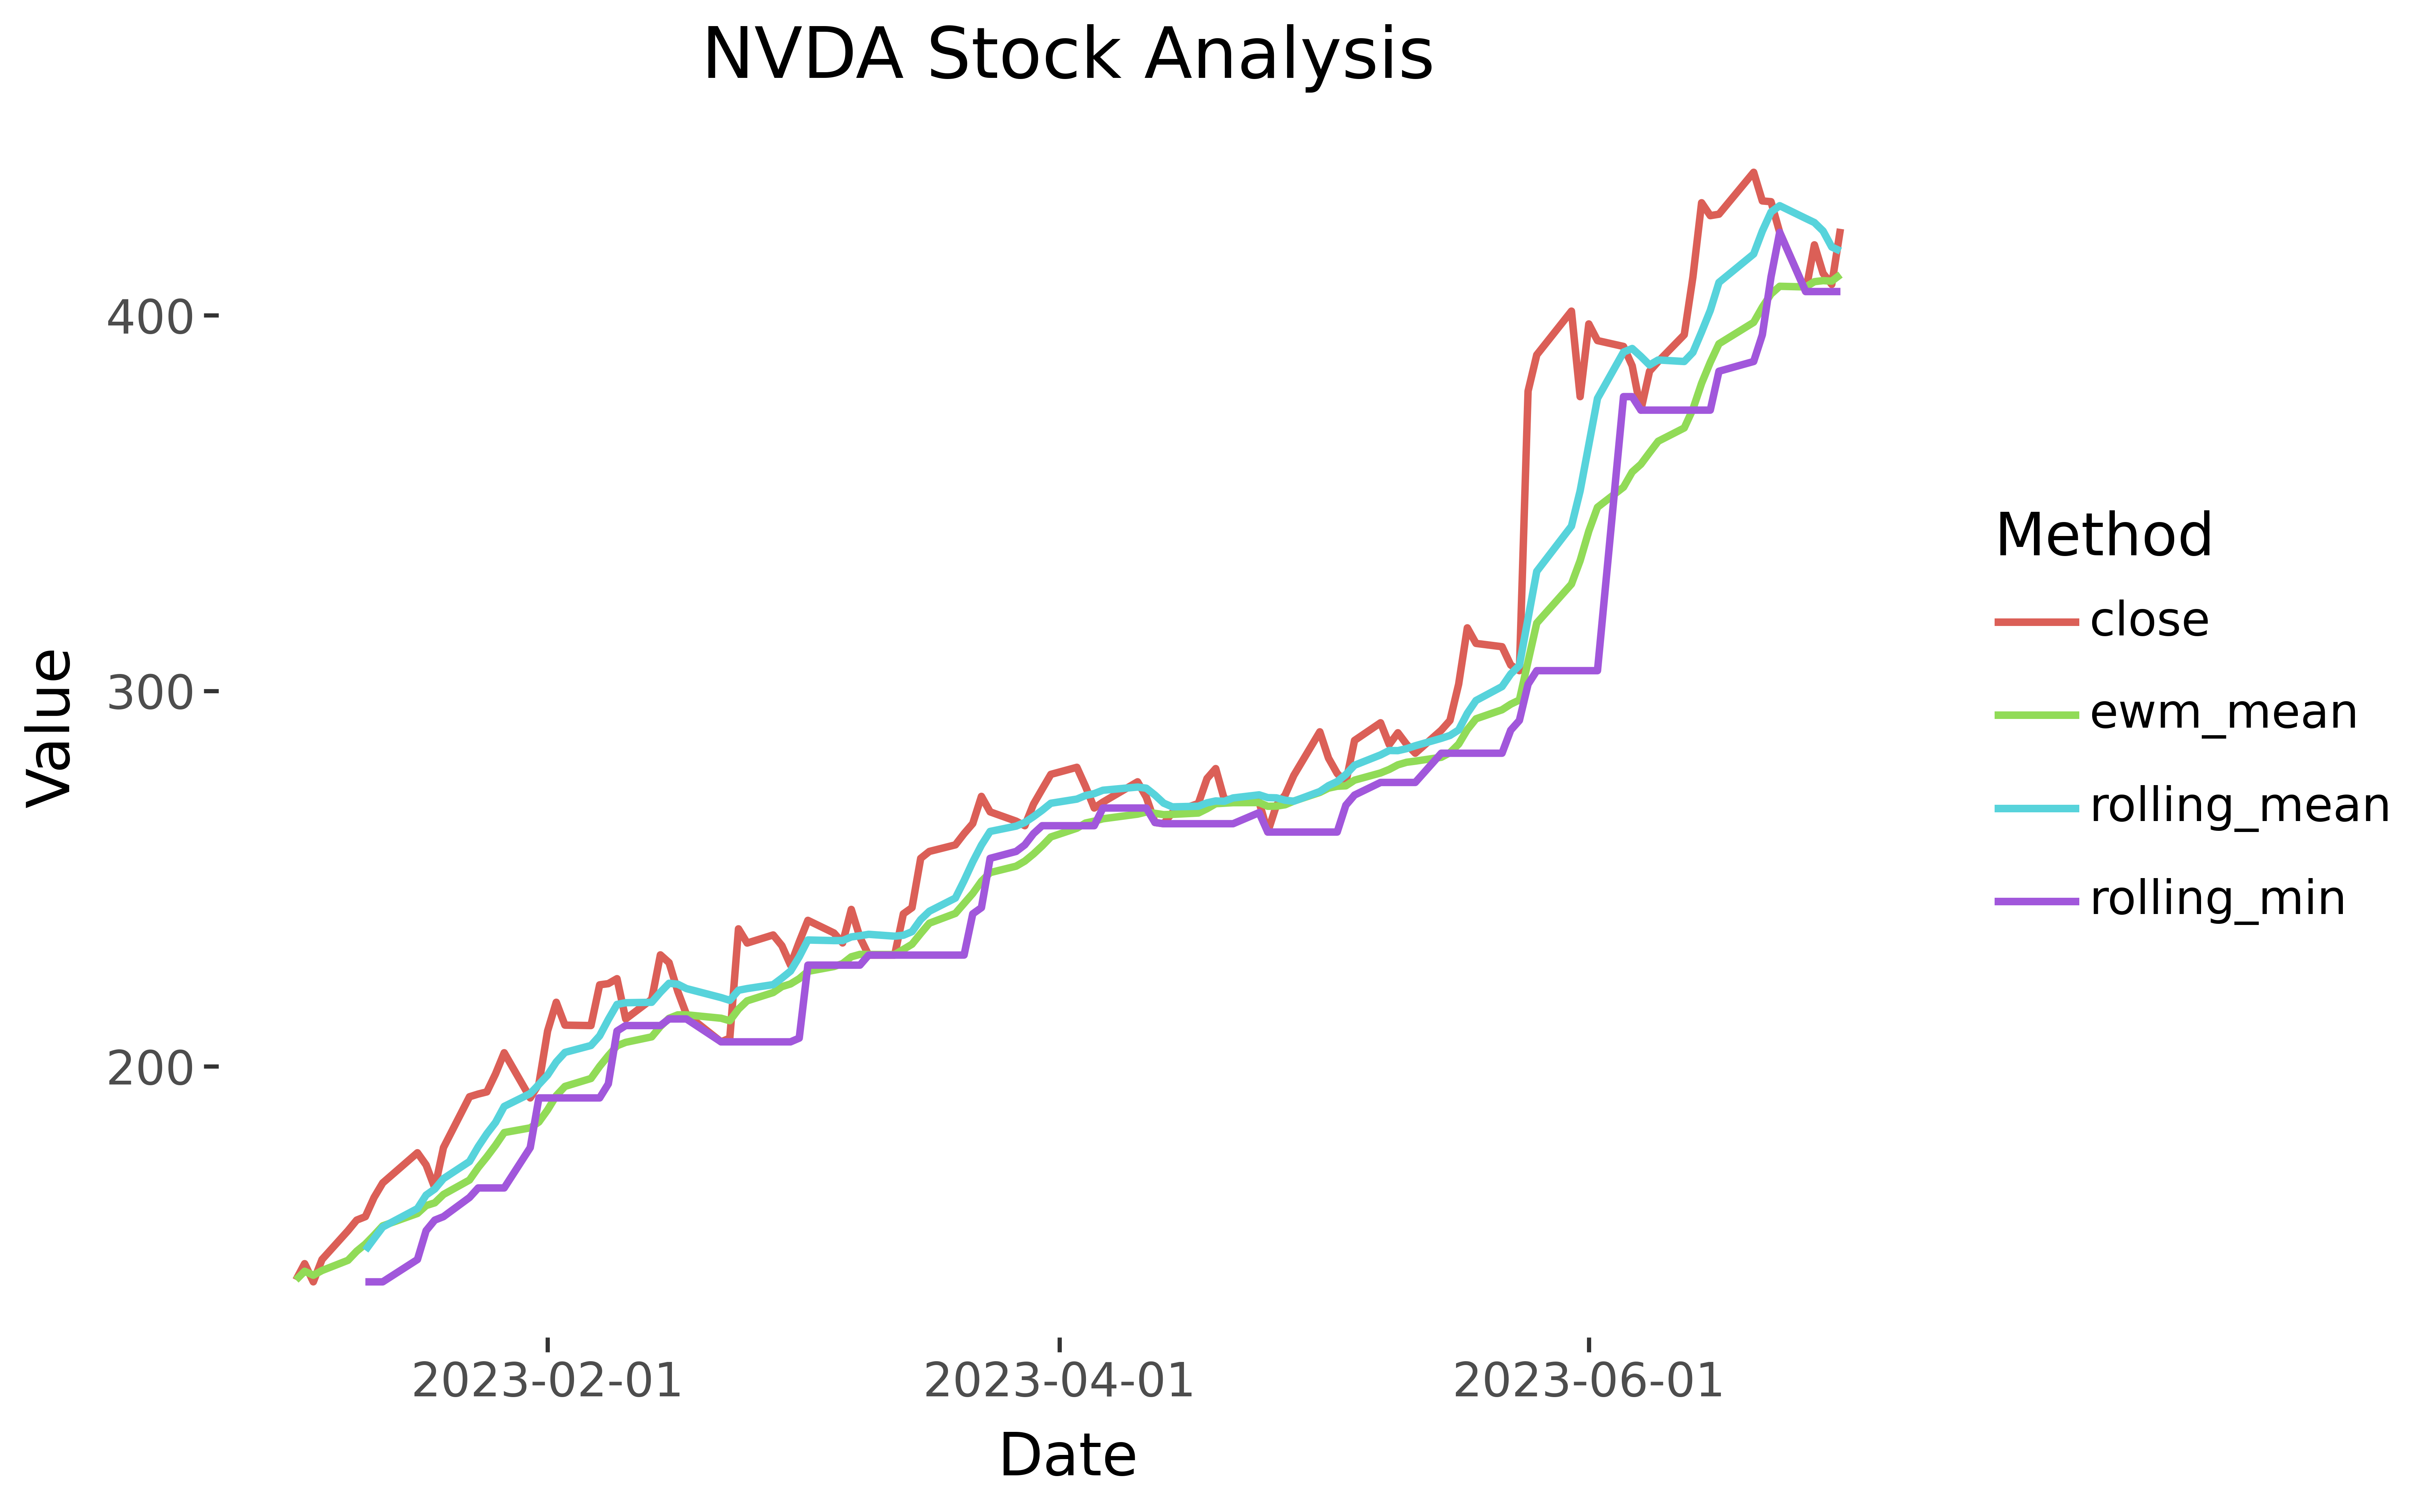

In [51]:
from plotnine import *

(
    ggplot(stock.unpivot(index="date"), aes(x="date", y="value", color="variable"))
    + geom_line(size=1)
    + labs(x="Date", y="Value", color="Method", title="NVDA Stock Analysis")
    + theme_tufte(base_size=14)
    + theme(figure_size=(8, 5), dpi=400)
)